## drinks
1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 데이터프레임의 정보를 출력하고 결측치가 존재하는가?
3. 컬럼의 이름들이 영문으로 되어있기 때문에 한글로 컬럼의 이름을 변경
4. 특정 컬럼에 결측치가 존재하기 때문에 결측치를 특정 문자로 대체
5. '총술소비량' 파생변수를 생성하여 술소비량 데이터들의 합산 대입
6. '순수알콜량'과 '총술소비량' 데이터를 기준으로 '도수'컬럼을 생성
7. 과연 한국의 총술소비량이 전체에서 몇위인가? 한국 사람들은 얼마나 독한 술을 먹는가?

In [1]:
import pandas as pd

In [2]:
# drinks.csv 파일 로드 
# 상위 폴더 이동(../) + csv 하위폴더로 이동(csv/) + drinks.csv
drinks = pd.read_csv("../csv/drinks.csv")

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
## 데이터프레임의 정보를 확인 
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
drinks['continent'].describe()

count     170
unique      5
top        AF
freq       53
Name: continent, dtype: object

In [7]:
drinks['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [8]:
## 결측치의 개수를 확인
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [9]:
## 컬럼의 이름을 변경 
drinks.columns = ['국가', '맥주소비량', '위스키소비량', '와인소비량', '순수알콜량', 
                  '대륙']

In [10]:
drinks.head(1)

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS


In [11]:
# 대륙 컬럼에 있는 결측치를 'OT' 문자열로 대체
drinks['대륙'] = drinks['대륙'].fillna('OT')

In [12]:
drinks

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [13]:
# 백업데이터를 생성 
df = drinks.copy()

In [14]:
# case1
df['맥주소비량'] + df['위스키소비량'] + df["와인소비량"]

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [15]:
# case2
df['총술소비량'] = df.loc[:,"맥주소비량" : "와인소비량"].sum(axis=1)

In [16]:
df.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [17]:
## '도수'컬럼을 생성하여 (순수알콜량 / 총술소비량) * 100
df['도수'] = ((df['순수알콜량'] / df['총술소비량']) * 100).fillna(0)

In [18]:
df.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530


In [19]:
## 총술소비량이 가장 높은 국가 10위까지 확인 
df.sort_values(['총술소비량'], ascending=False).head(10)

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
3,Andorra,245,138,312,12.4,EU,695,1.784173
68,Grenada,199,438,28,11.9,OT,665,1.789474
45,Czech Republic,361,170,134,11.8,EU,665,1.774436
61,France,127,151,370,11.8,EU,648,1.820988
141,Russian Federation,247,326,73,11.5,AS,646,1.780186
98,Lithuania,343,244,56,12.9,EU,643,2.006221
99,Luxembourg,236,133,271,11.4,EU,640,1.781250
65,Germany,346,117,175,11.3,EU,638,1.771160
75,Hungary,234,215,185,11.3,EU,634,1.782334
135,Poland,343,215,56,10.9,EU,614,1.775244


In [20]:
## 총술소비량을 기준으로 내림차순 정렬 
df.sort_values(['총술소비량'], ascending=False, inplace=True)

In [21]:
df.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
3,Andorra,245,138,312,12.4,EU,695,1.784173
68,Grenada,199,438,28,11.9,OT,665,1.789474
45,Czech Republic,361,170,134,11.8,EU,665,1.774436
61,France,127,151,370,11.8,EU,648,1.820988
141,Russian Federation,247,326,73,11.5,AS,646,1.780186


In [22]:
## 한국의 데이터만 필터링 
## df['국가'] == South Korea
flag = df['국가'] == 'South Korea'
df.loc[flag]

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
138,South Korea,140,16,9,9.8,AS,165,5.939394


In [23]:
# df의 인덱스를 초기화 (기존의 인덱스는 제거)
df.reset_index(drop=True, inplace=True)

In [24]:
flag = df['국가'] == 'South Korea'
df.loc[flag]

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
98,South Korea,140,16,9,9.8,AS,165,5.939394


In [25]:
## 도수를 기준으로 한국의 랭킹을 확인 
# 도수를 기준으로 내림차순 정렬
df.sort_values(['도수'], ascending=False, inplace=True)

In [26]:
# 인덱스를 초기화하고 기존의 인덱스는 제거
df.reset_index(drop=True, inplace=True)

In [27]:
flag = df['국가'] == 'South Korea'
df.loc[flag]

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [28]:
import matplotlib.pyplot as plt

In [29]:
# 총술소비량 데이터를 기준으로 막대그래프 생성 
df2 = df.copy()
df2.sort_values(['총술소비량'], ascending=False, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [30]:
# df2에서 한국의 인덱스의 값과 총술소비량 데이터를 추출하여 변수에 대입 
flag = df2['국가'] == 'South Korea'
korea_index = df2.loc[flag].index[0]
korea_value = df2.loc[korea_index, '총술소비량']

In [31]:
import platform
if platform.system() == 'Darwin':
    # MAC의 경우 
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

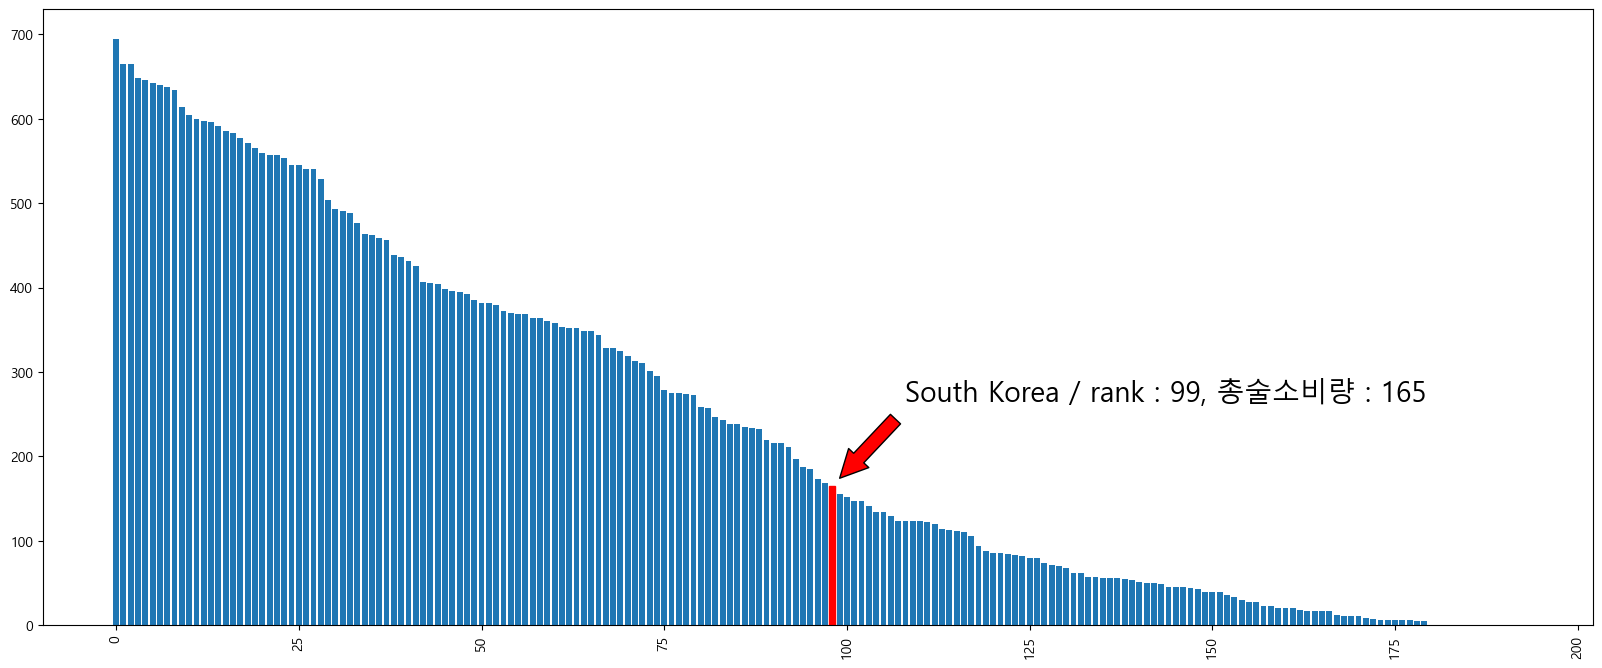

In [32]:
# x축 데이터 : 국가명
# y축 데이터 : 총술소비량
x = df2.index
y = df2['총술소비량']

# 그래프의 크기를 변경 
plt.figure(figsize=(20, 8))
graph = plt.bar(x, y)
graph[korea_index].set_color('r')

# 그래프에 주석을 추가 
plt.annotate(
    f"South Korea / rank : {korea_index + 1}, 총술소비량 : {korea_value}", 
    # 주석데이터가 의미하는 막대의 좌표
    xy = (korea_index, korea_value), 
    # 주석의 위치
    xytext = (korea_index + 10, korea_value + 100) , 
    # 주석의 크기를 변경
    fontsize = 20,
    # 주석과 막대 사이에 화살표를 추가 
    arrowprops= {
        'facecolor' : 'r', 
        'edgecolor' : 'k', 
        'headwidth' : 20, 
        'headlength' : 20, 
        'width' : 10, 
        'shrink' : 0.1
    }
)

# x축의 데이터들을 회전 
plt.xticks(rotation=90)
plt.show()

- df 데이터를 이용한 그래프 시각화
- 도수 컬럼을 기준으로 막대그래프 생성
- 한국의 막대의 색을 변경 
- 주석을 생성하여 South Korea : 랭킹(index+1), value : 도수 추가

In [33]:
df.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙,총술소비량,도수
0,Gambia,8,0,1,2.4,AF,9,26.666667
1,Sierra Leone,25,3,2,6.7,AF,30,22.333333
2,Nigeria,42,5,2,9.1,AF,49,18.571429
3,Uganda,45,9,0,8.3,AF,54,15.370370
4,Rwanda,43,2,0,6.8,AF,45,15.111111


In [34]:
# 한국이 몇번째 위치에 데이터가 존재하는가?
flag = df['국가'] == 'South Korea'
korea_index = df.loc[flag].index[0]
korea_value = df.loc[korea_index, '도수']

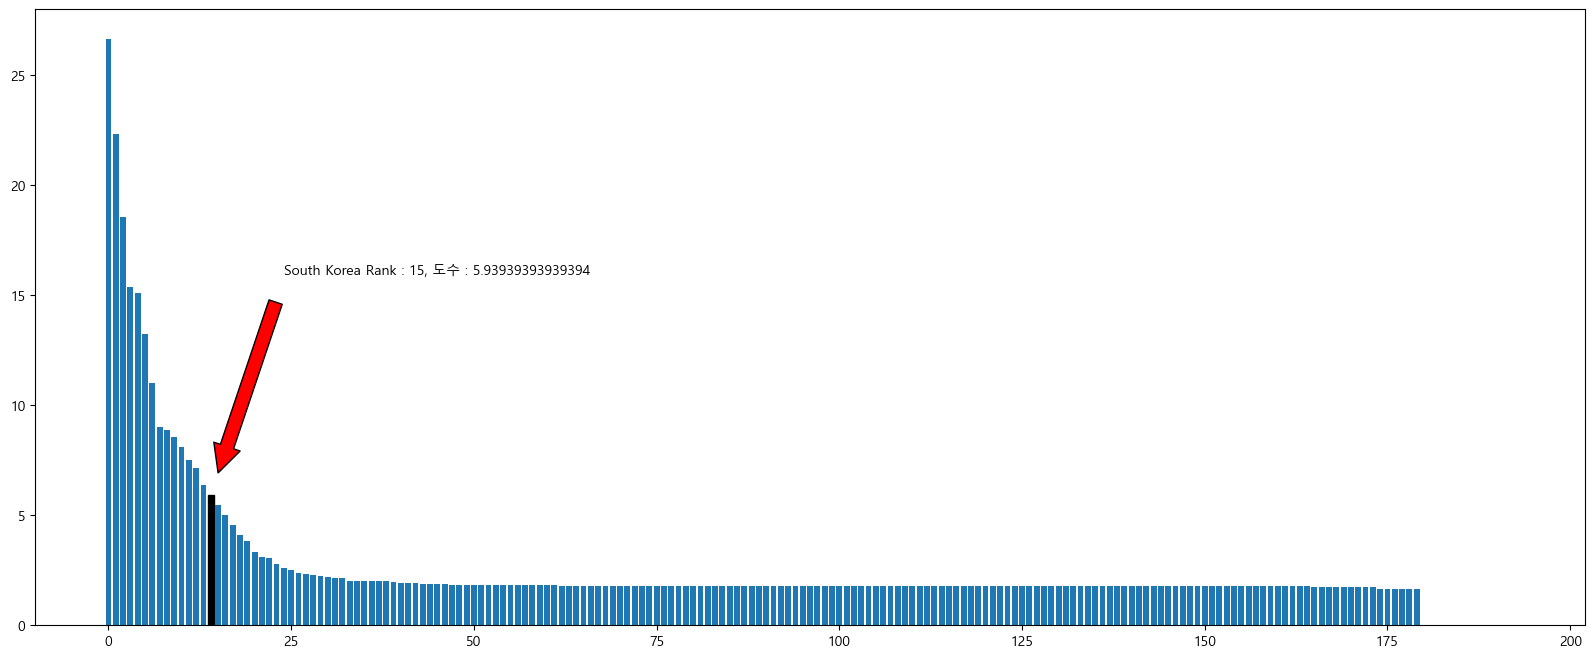

In [35]:
# 막대 그래프를 생성 
# x 데이터 : df의 인덱스 값
x = df.index
# y 데이터 :df의 도수 컬럼의 데이터
y = df['도수']

# 그래프의 크기를 변경
plt.figure(figsize=(20, 8))
graph = plt.bar(x, y)
# 특정 막대의 색상을 변경
graph[korea_index].set_color('k')

# 그래프에 주석을 추가 
plt.annotate(
    # 주석의 텍스트를 입력
    f"South Korea Rank : {korea_index + 1}, 도수 : {korea_value}", 
    # 주석이 설명하는 막대의 위치 
    xy = (korea_index, korea_value),
    # 주석의 위치
    xytext= (korea_index + 10, korea_value+10),
    # 화살표를 추가 (주석의 위치부터 주석이 설명하는 막대의 위치)
    arrowprops= {
        # 화살표의 내부의 색상
        'facecolor' : 'r', 
        # 화살표 테두리의 색상
        'edgecolor' : 'k', 
        # 화살표 머리의 너비 
        'headwidth' : 20, 
        # 화살표 머리의 길이
        'headlength' : 20, 
        # 화살표 꼬리의 너비 
        'width' : 10, 
        # 화살표와 주석 사이의 거리 (비율)
        'shrink' : 0.1
    }

)

plt.show()